In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
data_clean = pd.read_csv(r'D:\spring 25\appiled stat\anika Sprint 1\data\Processed\data_clean.csv')
data_clean.head()

,Year,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax,...,"route_Seattle, WA - Tucson, AZ","route_Seattle, WA - Washington, DC (Metropolitan Area)","route_St. Louis, MO - Tampa, FL (Metropolitan Area)","route_St. Louis, MO - Washington, DC (Metropolitan Area)","route_Syracuse, NY - Tampa, FL (Metropolitan Area)","route_Syracuse, NY - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - Toledo, OH","route_Tampa, FL (Metropolitan Area) - Washington, DC (Metropolitan Area)","route_Tulsa, OK - Washington, DC (Metropolitan Area)","route_Washington, DC (Metropolitan Area) - West Palm Beach/Palm Beach, FL"
0,2024,4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233,...,False,False,False,False,False,False,False,False,False,False
1,2024,4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417,...,False,False,False,False,False,False,False,False,False,False
2,2024,4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209,...,False,False,False,False,False,False,False,False,False,False
3,2024,4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705,...,False,False,False,False,False,False,False,False,False,False
4,2024,4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402,...,False,False,False,False,False,False,False,False,False,False


<Figure size 1200x1000 with 0 Axes>

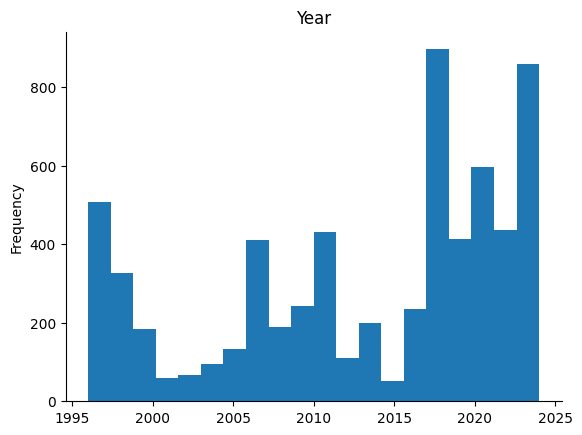

<Figure size 1200x1000 with 0 Axes>

In [5]:
### Data exploration
data_clean['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)
#make matrix plot with matplotlib
plt.figure(figsize=(12, 10))

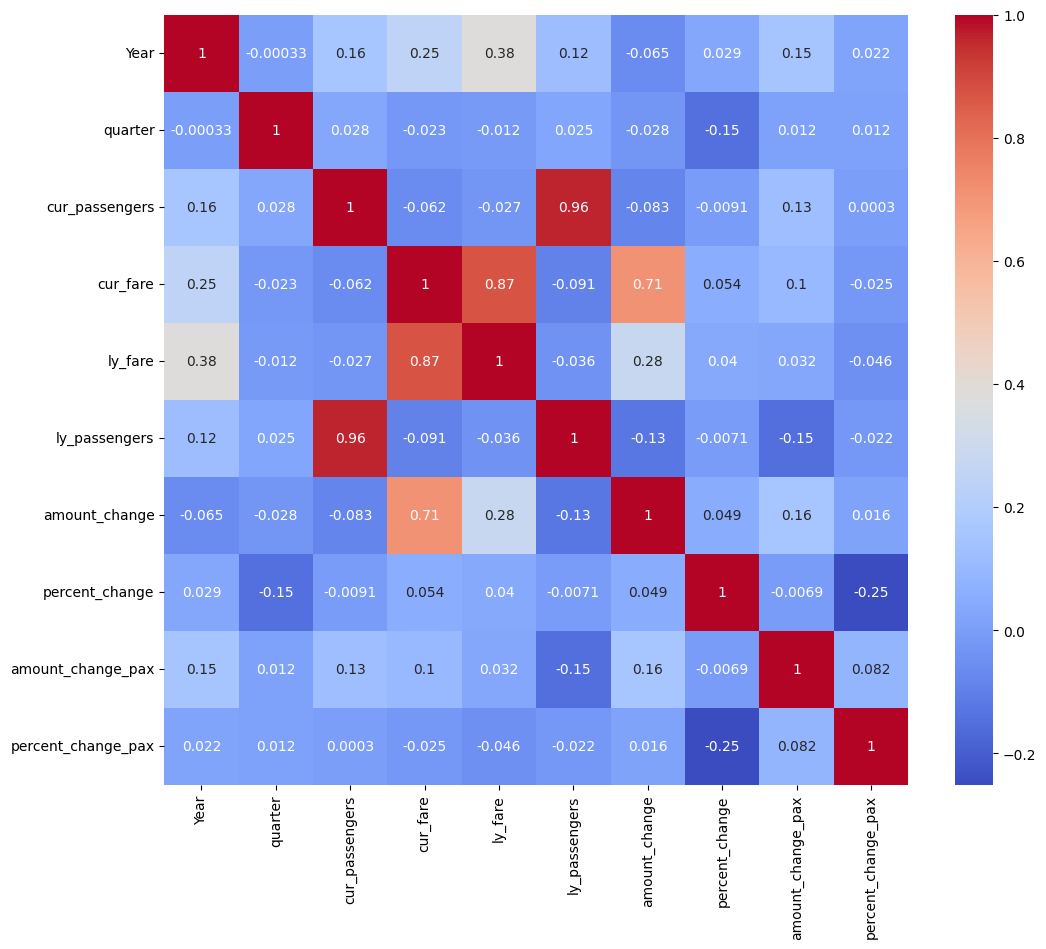

In [6]:
#make matrix plot with matplotlib
plt.figure(figsize=(12, 10))
# Select only numerical features for correlation analysis
numerical_data = data_clean.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

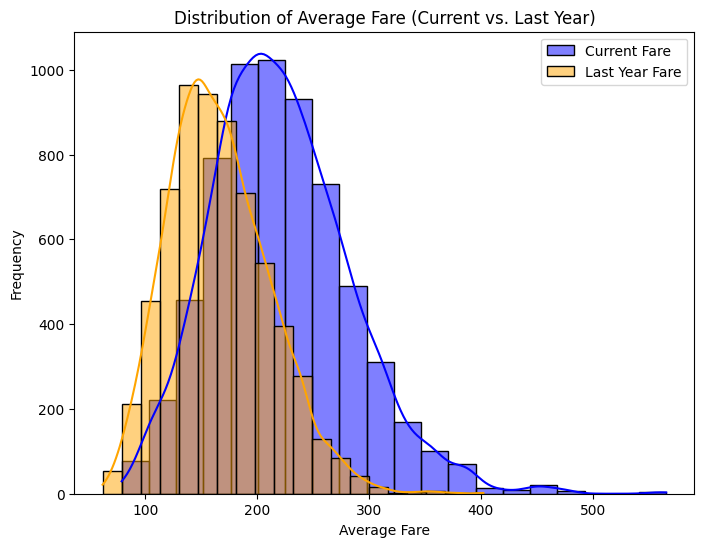

In [7]:
# plot
plt.figure(figsize=(8, 6))
# histograms with distinct colors and labels
sns.histplot(data_clean['cur_fare'], bins=20, kde=True, color='blue', label='Current Fare')
sns.histplot(data_clean['ly_fare'], bins=20, kde=True, color='orange', label='Last Year Fare')

plt.title('Distribution of Average Fare (Current vs. Last Year)')
plt.xlabel('Average Fare')
plt.ylabel('Frequency')

# Add a legend for clarity
plt.legend()

plt.show()

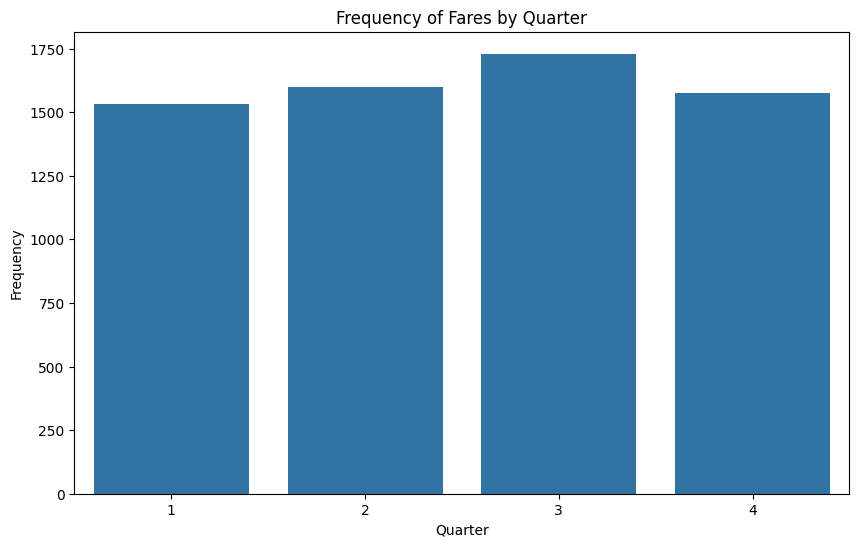

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

sns.countplot(x='quarter', data=data_clean)

plt.title('Frequency of Fares by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Frequency')

plt.show()

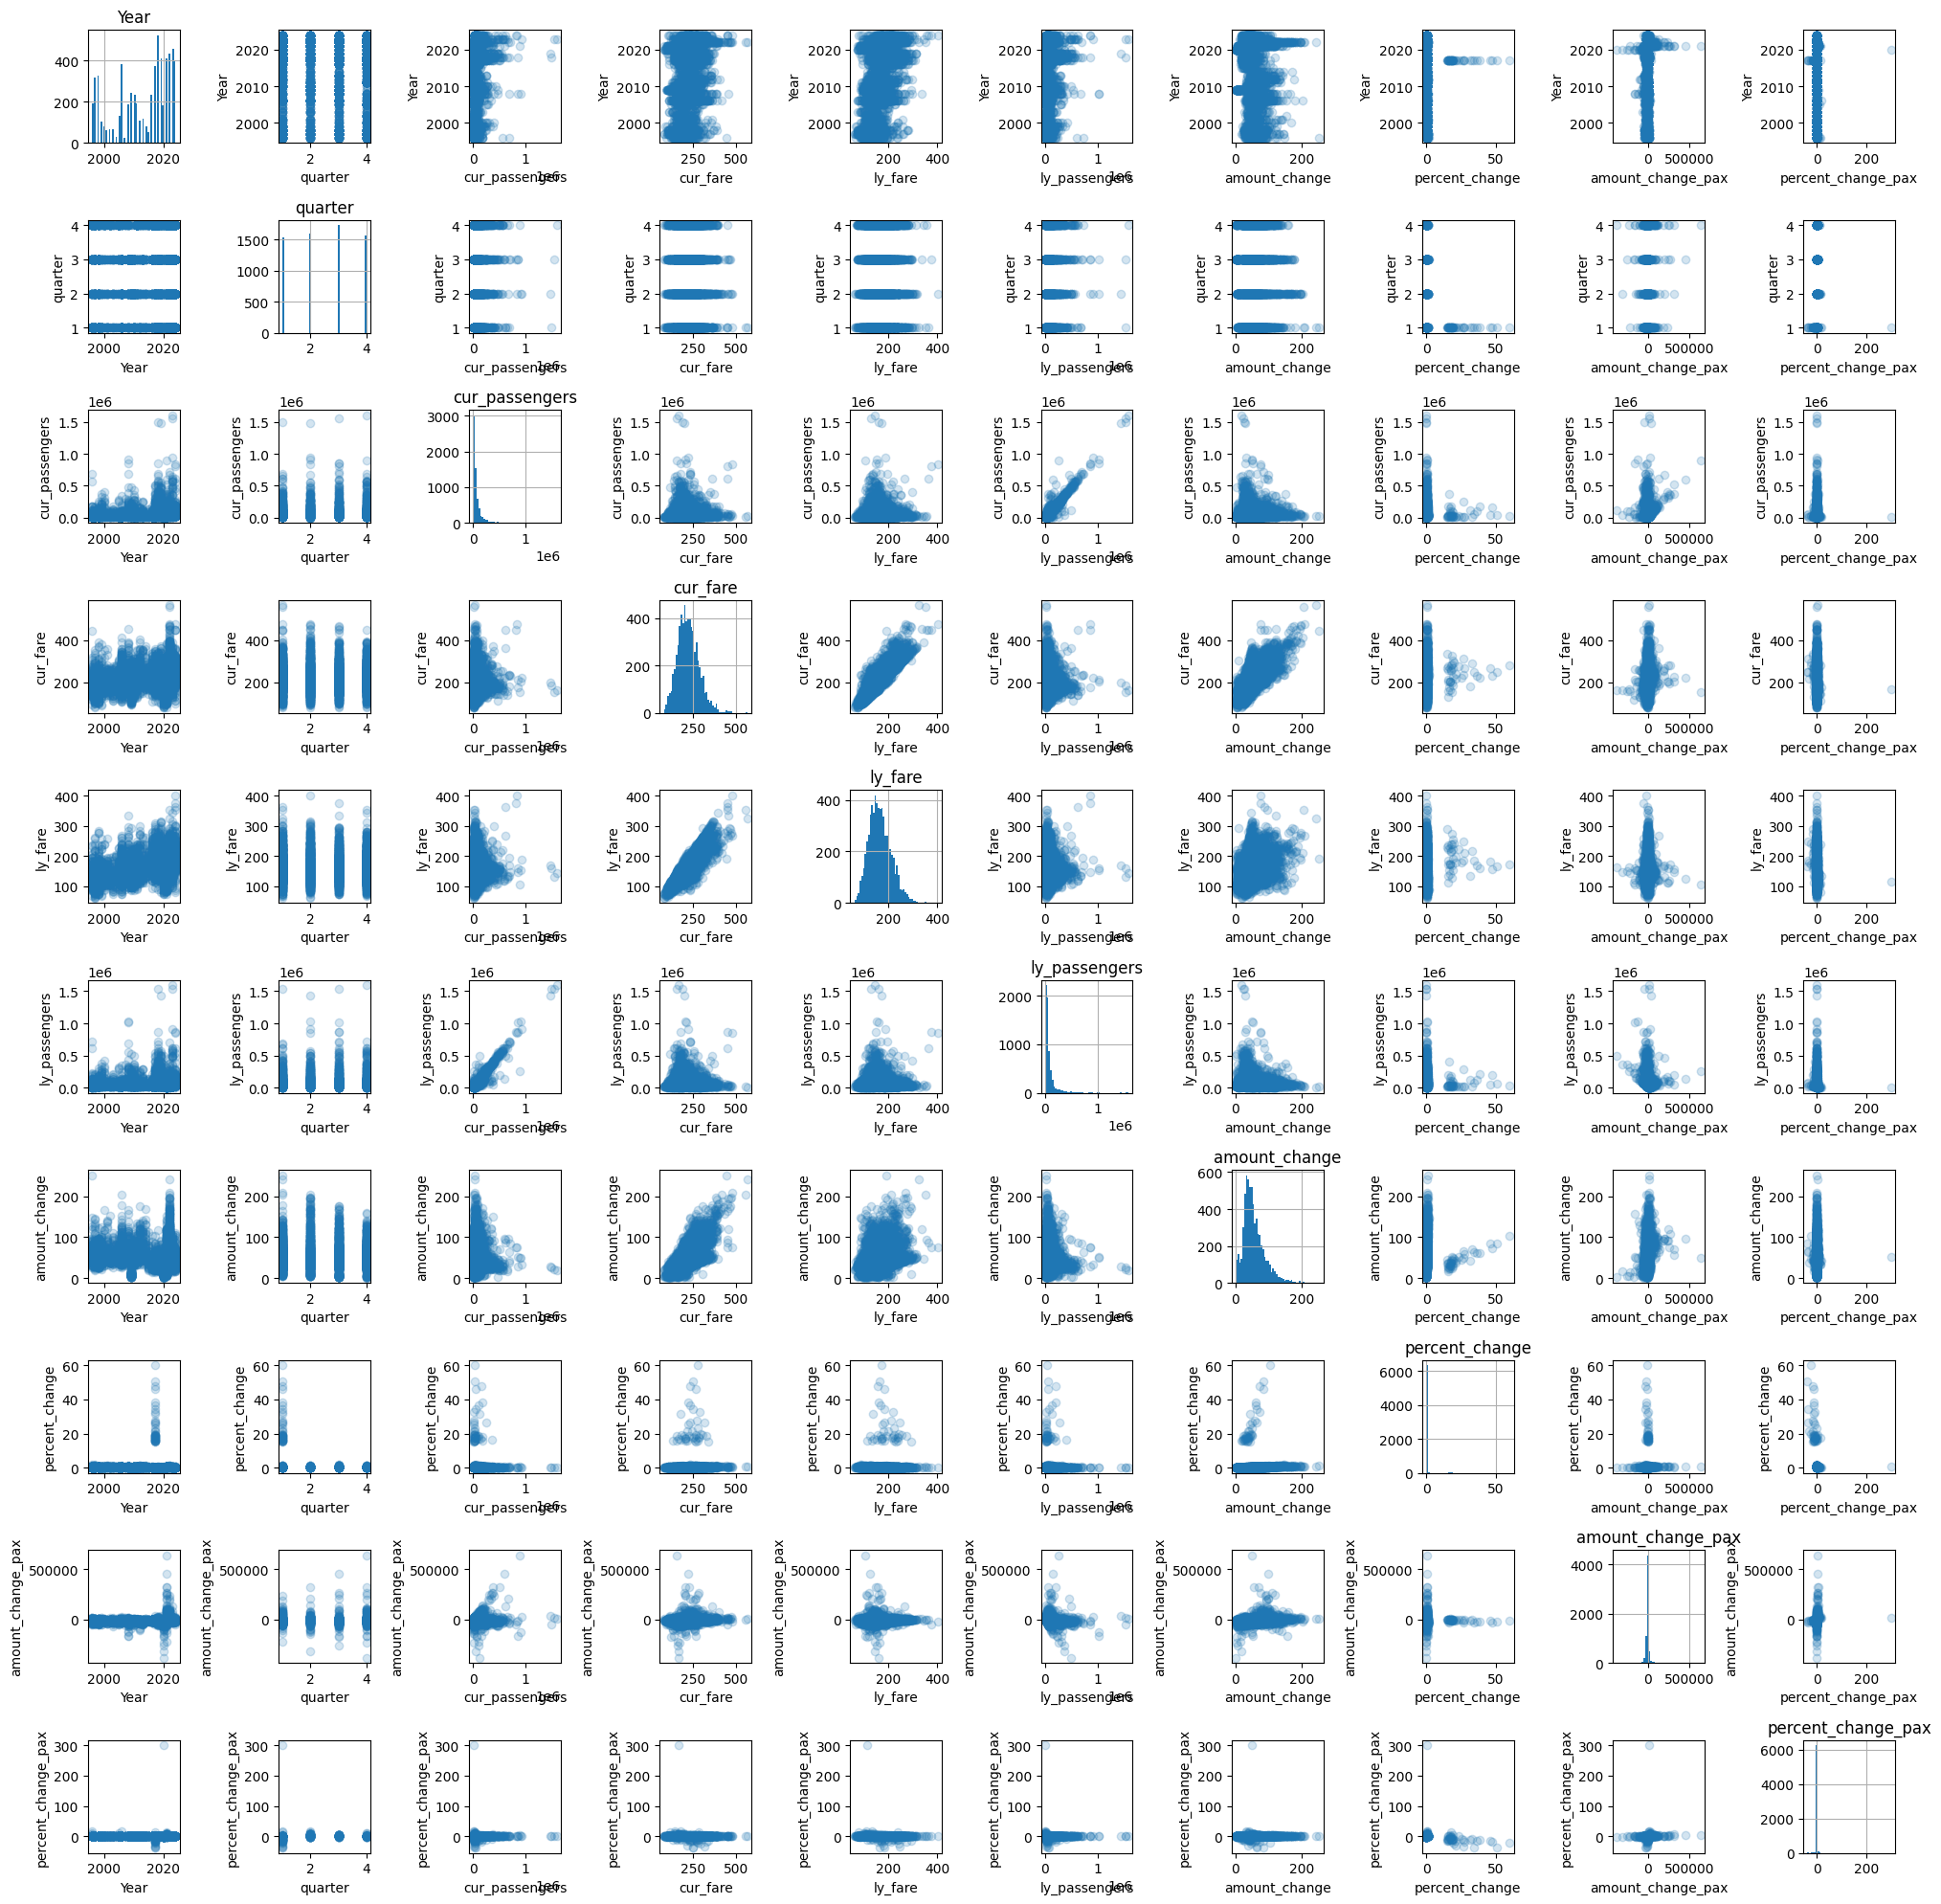

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Select numerical columns for the histogram matrix
numerical_cols = data_clean.select_dtypes(include=['number']).columns

# Create a figure and subplots
num_cols = len(numerical_cols)
fig, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(20,20))

# Iterate through columns and plot histograms
for i, col1 in enumerate(numerical_cols):
    for j, col2 in enumerate(numerical_cols):
        ax = axes[i, j]  # Get the current subplot
        if i == j:  # Diagonal: Plot histogram
            data_clean[col1].hist(ax=ax, bins=50)
            ax.set_title(col1)  # Set title to column name
        else:  # Off-diagonal: Plot scatter plot (or other relationship)
            ax.scatter(data_clean[col2], data_clean[col1], alpha=0.1)  # Example: Scatter plot
            ax.set_xlabel(col2)
            ax.set_ylabel(col1)

# Adjust layout and display
plt.tight_layout()
plt.show()